<a href="https://colab.research.google.com/github/saharshayegan/SocialNetXNLP/blob/main/SocialNetXNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
with open("/content/drive/MyDrive/twitter-April20/sahar_following_data-20220420", "rb") as fp:   # Unpickling
  sahar = pickle.load(fp)

# Load and vectorize the tweets of my friends
### **DO NOT RUN**

In [ ]:
import pandas as pd

In [ ]:
maanenaa = '2582056045'
if maanenaa not in sahar:
  sahar.append(maanenaa)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dec2021tweets.csv')
df2 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nov2021tweets.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,5,6,7,8,10,11,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df= df.loc[df.apply(lambda x: x.user_id in sahar, axis=1)]
df2= df2.loc[df2.apply(lambda x: x.user_id in sahar, axis=1)]

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/oct2021tweets.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sep2021tweets.csv')

In [ ]:
df3= df3.loc[df3.apply(lambda x: x.user_id in sahar, axis=1)]
df4= df4.loc[df4.apply(lambda x: x.user_id in sahar, axis=1)]

In [ ]:
filtered = pd.concat([df, df2, df3, df4])

In [ ]:
del df
del df2
del df3
del df4

In [ ]:
filtered.shape

(15249, 18)

In [ ]:
filtered.columns

Index(['language', 'conversation_id', 'retweets_count', 'mentions',
       'created_at', 'likes_count', 'possibly_sensitive',
       'in_reply_to_user_id', '_id', 'source', 'user_id',
       'in_reply_to_status_id', 'tweet', 'replies_count', 'quoted_status_id',
       'hashtags', 'cashtags', 'urls'],
      dtype='object')

In [ ]:
uniques = filtered['user_id'].unique()

In [ ]:
len(uniques)

481

In [ ]:
import pickle
pickle_out = open("/content/drive/MyDrive/twitter-April20/uniques.pickle", "wb")
pickle.dump(uniques, pickle_out)
pickle_out.close()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()

In [ ]:
x = v.fit_transform(filtered['tweet'])

In [ ]:
arr = x.toarray()

In [ ]:
del x

In [ ]:
len(arr[0])

30470

In [ ]:
len(arr)

15249

# Find the tweets of each user and get the sum of their vectors
### **DO NOT RUN**

In [ ]:
filtered = filtered.reset_index(level=0)

In [ ]:
import numpy as np
user_vec = pd.DataFrame(columns=['user_id','vector'])
counter= 0
for id in sahar:
  print(counter, end=' ')
  counter+=1
  indices = (filtered.loc[filtered.apply(lambda x: x.user_id == id, axis=1)].reset_index(level=0))['level_0']
  vec_sum = np.zeros((1,len(arr[0])))
  for i in indices:
    vec_sum += arr[i]
  dic = {'user_id':id, 'vector':vec_sum/len(indices)}
  user_vec = user_vec.append(dic, ignore_index = True)

0 1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 27

In [ ]:
del vec_sum

In [ ]:
# vec_sum

In [ ]:
print(user_vec.shape)
user_vec.head()

(699, 2)


,user_id,vector
0,865981751444852736,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,724963088286502912,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
2,1020607462804795393,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,1339288641789628422,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,868167946505474050,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."


In [ ]:
# Instead of 'sahar' I should have used 'uniques'
# and checked in each loop if user_id is in 'uniques'
# because I have no tweets from the ones that are not in uniques
import string
from scipy.spatial import distance

# distance.euclidean(arr[0], arr[1])
cols = ['index'].extend(uniques)
df_ids = pd.DataFrame(columns=cols)
# df_ids['index'] = df_ids['index'].astype('str')
for index, row in user_vec.iterrows():

  if row['user_id'] in uniques:
    dist_dict = {}
    dist_dict['index']=str(row['user_id'])
    # print(row['user_id'])

    for ind, ro in user_vec.iterrows():

      # if ind > index and ro['user_id'] in uniques:
      if ro['user_id'] in uniques:

        if not np.isnan(row['vector']).any() and not np.isnan(ro['vector']).any():
          dist_dict[ro['user_id']] = distance.euclidean(row['vector'], ro['vector'])

    # print(dist_dict['index'])
    df_ids = df_ids.append(dist_dict, ignore_index = True)
    # print(df_ids['index'])
    # print('added {}'.format(row['user_id']))
    print(index, end=' ')


0 2 3 11 12 13 14 16 19 20 23 24 25 26 27 29 30 31 33 34 35 37 38 41 44 45 48 53 57 58 59 60 62 64 65 67 68 69 71 72 73 74 75 76 77 78 79 82 83 84 86 87 88 89 90 92 93 94 95 96 97 98 99 100 102 103 104 106 109 110 111 112 113 114 116 117 118 119 120 121 122 124 125 126 127 128 131 132 135 136 138 139 140 141 142 143 144 145 146 147 148 149 150 152 153 154 155 158 160 162 163 164 165 168 169 170 171 172 173 174 175 176 177 178 180 181 182 183 185 186 187 188 190 191 192 193 194 195 196 198 199 200 203 204 205 206 207 208 209 210 211 212 213 215 216 217 218 219 220 223 224 225 226 229 230 232 233 234 237 238 239 240 241 242 245 246 247 251 252 254 257 258 259 261 262 264 265 266 267 268 270 271 272 273 274 276 277 278 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 298 299 300 304 305 306 307 308 309 310 312 313 314 315 318 319 321 322 323 324 325 326 327 328 329 331 332 334 335 339 340 341 342 343 344 345 346 347 348 350 351 352 353 355 356 357 359 360 361 362 363 36

In [ ]:
# Want to sort the df columns so that the matrix is symmetric
sorting_list = ['index']
for i, row in user_vec.iterrows():
  if(row['user_id'] in uniques):
    sorting_list.append(row['user_id'])

df_ids = df_ids[sorting_list]

In [ ]:
# df_ids.columns

In [ ]:
df_ids['min'] = (df_ids[uniques])[df_ids[uniques]>0].idxmin(axis=1)

In [ ]:
# Moving the 'id' column to the begining
column_to_move = df_ids.pop("min")
# insert column with insert(location, column_name, column_value)
df_ids.insert(1, "min", column_to_move)

In [ ]:
df_ids

,index,min,865981751444852736,1020607462804795393,1339288641789628422,1266258111397912576,1030026976164229120,1201169360485830657,359022772,1034137009189732352,...,1646169098,862760815920902144,861653502946398208,630199052,754826845875539968,4839508725,4906563567,4835841857,1638277826,573843309
0,865981751444852736,966776088834838532,0.000000,0.143907,0.154669,0.247514,0.197173,0.300360,0.418881,0.298491,...,0.265528,0.166327,0.318253,0.303903,0.163981,0.237580,0.306843,0.460222,0.444726,0.990609
1,1020607462804795393,756623112528068609,0.143907,0.000000,0.145358,0.236877,0.192780,0.293122,0.420982,0.292316,...,0.263943,0.154567,0.313572,0.296239,0.155618,0.229001,0.298643,0.458855,0.443523,0.982092
2,1339288641789628422,853662554492735488,0.154669,0.145358,0.000000,0.240840,0.195516,0.296730,0.415807,0.295963,...,0.267769,0.167511,0.318144,0.298318,0.161715,0.234322,0.303546,0.460453,0.444838,0.989666
3,1266258111397912576,1279858901492666369,0.247514,0.236877,0.240840,0.000000,0.261939,0.349277,0.453654,0.349937,...,0.321840,0.250102,0.371559,0.344108,0.228180,0.263531,0.331490,0.492757,0.458982,1.013760
4,1030026976164229120,756623112528068609,0.197173,0.192780,0.195516,0.261939,0.000000,0.318324,0.438012,0.319803,...,0.298517,0.205941,0.341818,0.322835,0.185181,0.249651,0.322161,0.475302,0.448825,1.004391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,4839508725,1279858901492666369,0.237580,0.229001,0.234322,0.263531,0.249651,0.329019,0.451994,0.330474,...,0.323149,0.243424,0.360810,0.339437,0.202057,0.000000,0.337828,0.483022,0.460186,1.007612
477,4906563567,19761241,0.306843,0.298643,0.303546,0.331490,0.322161,0.386534,0.496536,0.389741,...,0.371417,0.305839,0.416353,0.387490,0.303109,0.337828,0.000000,0.529431,0.503475,1.032884
478,4835841857,853662554492735488,0.460222,0.458855,0.460453,0.492757,0.475302,0.527124,0.595824,0.523628,...,0.514135,0.463290,0.541076,0.516421,0.459958,0.483022,0.529431,0.000000,0.617666,1.092087
479,1638277826,998955143612846080,0.444726,0.443523,0.444838,0.458982,0.448825,0.501998,0.593157,0.511065,...,0.493261,0.449521,0.507707,0.511718,0.442251,0.460186,0.503475,0.617666,0.000000,1.086366


In [ ]:
df_ids.head(15)

,index,min,865981751444852736,1020607462804795393,1339288641789628422,1266258111397912576,1030026976164229120,1201169360485830657,359022772,1034137009189732352,...,1646169098,862760815920902144,861653502946398208,630199052,754826845875539968,4839508725,4906563567,4835841857,1638277826,573843309
0,865981751444852736,966776088834838532,0.000000,0.143907,0.154669,0.247514,0.197173,0.300360,0.418881,0.298491,...,0.265528,0.166327,0.318253,0.303903,0.163981,0.237580,0.306843,0.460222,0.444726,0.990609
1,1020607462804795393,756623112528068609,0.143907,0.000000,0.145358,0.236877,0.192780,0.293122,0.420982,0.292316,...,0.263943,0.154567,0.313572,0.296239,0.155618,0.229001,0.298643,0.458855,0.443523,0.982092
2,1339288641789628422,853662554492735488,0.154669,0.145358,0.000000,0.240840,0.195516,0.296730,0.415807,0.295963,...,0.267769,0.167511,0.318144,0.298318,0.161715,0.234322,0.303546,0.460453,0.444838,0.989666
3,1266258111397912576,1279858901492666369,0.247514,0.236877,0.240840,0.000000,0.261939,0.349277,0.453654,0.349937,...,0.321840,0.250102,0.371559,0.344108,0.228180,0.263531,0.331490,0.492757,0.458982,1.013760
4,1030026976164229120,756623112528068609,0.197173,0.192780,0.195516,0.261939,0.000000,0.318324,0.438012,0.319803,...,0.298517,0.205941,0.341818,0.322835,0.185181,0.249651,0.322161,0.475302,0.448825,1.004391
5,1201169360485830657,853662554492735488,0.300360,0.293122,0.296730,0.349277,0.318324,0.000000,0.483304,0.385346,...,0.372910,0.306866,0.408043,0.394869,0.298101,0.329019,0.386534,0.527124,0.501998,1.022602
6,359022772,853662554492735488,0.418881,0.420982,0.415807,0.453654,0.438012,0.483304,0.000000,0.482061,...,0.473467,0.424590,0.502884,0.487181,0.422787,0.451994,0.496536,0.595824,0.593157,1.077481
7,1034137009189732352,1114539047307882497,0.298491,0.292316,0.295963,0.349937,0.319803,0.385346,0.482061,0.000000,...,0.371305,0.301500,0.412840,0.390820,0.297983,0.330474,0.389741,0.523628,0.511065,1.023311
8,1464993254215147520,853662554492735488,0.262819,0.259044,0.261174,0.312734,0.281772,0.355037,0.454251,0.357585,...,0.343448,0.272345,0.380425,0.363864,0.252560,0.296219,0.371991,0.504262,0.484797,1.020811
9,1069982011593494529,19761241,0.214726,0.207036,0.210166,0.277898,0.244061,0.331572,0.441254,0.326782,...,0.303725,0.221353,0.351325,0.335327,0.218522,0.269660,0.333115,0.484753,0.469307,1.005528


In [ ]:
df_ids.to_csv('/content/drive/MyDrive/twitter-April20/Distance of My Network Users NLP.csv')

In [ ]:
del df_ids

# Create the nerwork

## Create the language network

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/twitter-April20/Distance of My Network Users NLP.csv')

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df['index'] = df['index'].astype('str')

In [ ]:
import networkx as nx

In [ ]:
with open("/content/drive/MyDrive/twitter-April20/sahar_following_data-20220420", "rb") as fp:   # Unpickling
  sahar = pickle.load(fp)

In [ ]:
with open("/content/drive/MyDrive/twitter-April20/uniques.pickle", "rb") as fp:   # Unpickling
  uniques = pickle.load(fp)

In [ ]:
g_vecs = nx.Graph()
INF = 100000
str_uniques = [str(id) for id in uniques]
counter=0
for i,row in df.iterrows():
  for id in str_uniques:
    if g_vecs.has_edge(row['index'],id):
      counter+=1
    else:
      if(row[id]!=id):
        if(row[id]!=0):
          g_vecs.add_edge(row['index'],id, weight=1/row[id])
        elif(row[id] == 0):
          g_vecs.add_edge(row['index'],id, weight=INF)
        else:
          print(row[id])
print(counter,' edges added')

115440  edges added


In [ ]:
import numpy as np
average_weight=np.average([d['weight'] for (u, v, d) in g_vecs.edges(data=True) if d['weight']!=INF])

In [ ]:
# Save the graph
# nx.write_gexf(g_vecs, "/content/drive/MyDrive/twitter-April20/NLP network of my friends.gexf")

In [ ]:
max_weight = 0
weights_list = []
edges = g_vecs.edges
for edge in edges:
  if edge[0] != edge[1]:
    # print(g_vecs.get_edge_data(edge[0],edge[1])['weight'])
    max_weight = max(max_weight, g_vecs.get_edge_data(edge[0],edge[1])['weight'])
    weights_list.append(g_vecs.get_edge_data(edge[0],edge[1])['weight'])

In [ ]:
max_weight

8.827393276767106

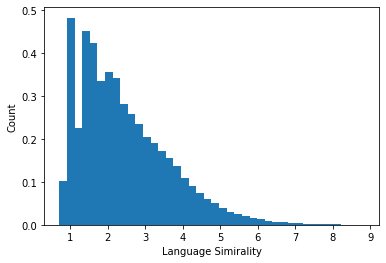

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x=weights_list
plt.hist(x, density=True, bins=40)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Language Simirality');

In [32]:
print('edges: ', len(g_vecs.edges))
print('nodes: ', len(g_vecs.nodes))

edges:  115921
nodes:  481


## Draw the language network
##### I dont even need this

In [ ]:
# I wanted to draw g but there might be a problem with the weights
# so I chosed the edge colors with g and drew g2 with that list
import matplotlib.pyplot as plt

elarge = [(u, v) for (u, v, d) in g_vecs.edges(data=True) if d["weight"] > average_weight or d['weight'] == INF]
esmall = [(u, v) for (u, v, d) in g_vecs.edges(data=True) if d["weight"] <= average_weight and  d['weight'] != INF]
# print(len(elarge))
# print(len(esmall))
# print(len(elarge)+len(esmall)) ## WHY THIS IS NOT EQUAL TO LEN(EDGES)?
pos = nx.spring_layout(g_vecs,seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(g_vecs, pos, node_size=7, node_color='w')

# edges
nx.draw_networkx_edges(g_vecs, pos, edgelist=elarge, width=0.01, edge_color='r')
nx.draw_networkx_edges(
    g_vecs, pos, edgelist=esmall, width=0.006, alpha=0.5, edge_color="b", style="dashed"
)

# labels
# nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
fig = plt.figure()

ax = plt.gca()
plt.figure(figsize=(15,7.5),dpi=80) 
ax.margins(0.08)
plt.axis("off")
# plt.draw()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/twitter-April20/plot2.png')
plt.show()
fig.savefig('figure', dpi = 150)

KeyboardInterrupt: ignored

In [ ]:
plt.savefig('/content/drive/MyDrive/twitter-April20/plot2.png')

<Figure size 432x288 with 0 Axes>

## Load the data of your friends and their friends

In [ ]:
import networkx as nx

In [ ]:
import pickle
with open("/content/drive/MyDrive/twitter-April20/sahar_following_data-20220420", "rb") as fp:   # Unpickling
  sahar = pickle.load(fp)

In [ ]:
import os
path = '/content/drive/MyDrive/twitter-April20/data/'
files = [file for file in os.listdir(path)]
print(files)

['865981751444852736_following_data', '724963088286502912_following_data', '1020607462804795393_following_data', '1339288641789628422_following_data', '868167946505474050_following_data', '1356233634789924864_following_data', '18065266_following_data', '1002967767635677184_following_data', '845228209578872832_following_data', '900895135_following_data', '64705947_following_data', '1266258111397912576_following_data', '1030026976164229120_following_data', '1201169360485830657_following_data', '359022772_following_data', '2568319752_following_data', '1034137009189732352_following_data', '891016261077004288_following_data', '1508880748517810185_following_data', '1464993254215147520_following_data', '1069982011593494529_following_data', '3351632566_following_data', '3046283561_following_data', '986561881426006016_following_data', '983295355545702400_following_data', '463069566_following_data', '850946423474405377_following_data', '1455550333107773446_following_data', '1602489714_following_

## Create the graph of your friends

In [41]:
len(sahar)

698

In [62]:
g_fr = nx.Graph()
for file in files:
  id = file.split(sep='_')[0]
  if id in map(str, uniques):
    with open("/content/drive/MyDrive/twitter-April20/data/{}".format(file), "rb") as fp:
      friends = pickle.load(fp)
    for friend in friends:
      if friend in uniques:
        g_fr.add_edge(id, str(friend))

In [60]:
type(friend)

int

In [59]:
print('edges: ', len(g_fr.edges))
print('nodes: ', len(g_fr.nodes))

edges:  0
nodes:  0


int